# CSE527 Homework2
**Due date: TBD**

---
In this semester, we will use Google Colab for the assignments, which allows us
to utilize resources that some of us might not have in their local machines
such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account
for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial
named "Welcome to Colaboratory" file, where you can learn the basics of using
google colab.

## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment
where lots of libraries or packages have already been installed. In case of
missing libraries or if you want to install them in your local machine, below
are the links for installation.
* **Install Python 3.6.9**: https://www.python.org/downloads/ or
use Anaconda (a Python distribution) at
https://docs.continuum.io/anaconda/install/. Below are some materials and
tutorials which you may find useful for learning Python if you are new to
Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - https://docs.opencv.org/4.1.2/d6/d00/tutorial_py_root.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`,
`opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
```
    Note that when using “pip install”, make sure that the version you are
    using is python3. Below are some commands to check which python version it
    uses in you machine. You can pick one to execute:

```
    pip show pip
    pip --version
    pip -V
```

In case of the wrong version, use `pip3` for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at
http://jupyter.org/install.html to install Jupyter Notebook and familiarize
yourself  with it. *After you have installed Python and Jupyter Notebook,
please open this notebook file with your Jupyter Notebook and do your homework
there.*

## Description
---
In this homework, you will experiment with SURF features for scene matching and
object recognition. You don't need to build a SURF detector or descriptor from
scratch, but you are **STRONGLY** encouraged to read this paper in which
purposed SURF(SURFSpeededUpRobustFeatures.pdf) unless you’re already quite
familiar with it.

There are three problems with a total of 100 points. Two bonus questions with
extra 5 and 15 points are provided under problem 1 and problem 2 respectively.
The maximum points you may earn from this homework is 100 + 20 = 120 points.
After you complete all the tasks, be sure to read and follow the **Submission
Guidelines** in the end.

## Using SURF in OpenCV 3.x.x
---
The default version of OpenCV in Colab is 4.1.2. But by default, it doesn't
contain `SIFT` or `SURF` features anymore. Read the article below to learn more
background:
- https://www.pyimagesearch.com/2015/07/16/where-did-sift-and-surf-go-in-opencv-3/

One simple way to use the OpenCV in-built function `SURF` in Colab is to switch
to an older version with the `contrib` module. Below is an example of how to
switch the OpenCV version:

1. Run the following command in one section in Colab, which has already been
included in this assignment:
```
pip install opencv-contrib-python==3.4.2.16
```
2. Restart runtime/kernel by
```
Runtime -> Restart Runtime
```

---
If you are working on your **local machine**, you can follow the same procedure
above to switch the OpenCV version. You are highly encouraged to use
`virtualvenv` so that you won't mess up the packages you've already installed.

Follow the tutorial below to create a virtual environment before you make any
changes by using pip.
- https://docs.python.org/3.6/tutorial/venv.html

Then you can add the virtual environment to your notebook as a new kernel:
- https://queirozf.com/entries/jupyter-kernels-how-to-add-change-remove

Remember to run this file using your newly installed virtual kernel.

---

Check the version of OpenCV you are using now by printing `cv2.__version__`. If
it shows `3.4.2`, then you should be able to use the `SURF` feature directly
from OpenCV.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# pip install the OpenCV version from 'contrib'
%pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6 MB 27 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [1]:
# import packages here
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
print(cv2.__version__) # verify OpenCV version

3.4.2


In [2]:
ls

drive/  sample_data/


In [3]:
# Replace -----/-----/-----/' with the path such that "CSE527-HW2-fall20" is
# your working directory
%cd '/content/drive/MyDrive/ColabNotebooks/CSE527CV/kumar_arun_114708780_pa2'

/content/drive/MyDrive/ColabNotebooks/CSE527CV/kumar_arun_114708780_pa2


## Problem 1: Match transformed images using SURF features
{40 points + bonus 5} You will transform a given image, and match it back to
the original image using SURF keypoints.

- **Step 1 (5pt)**. Use the function from SURF class to create a SURF detector.
  Set Hessian Threshold to `5000`. Then detect keypoints from the given image
  and plot the image with keypoints scale and orientation overlaid.

- **Step 2 (10pt)**. Rotate your image clockwise by `60` degrees with the
  `cv2.warpAffine` function. Extract SURF keypoints for this rotated image and
  plot the rotated picture with keypoints scale and orientation overlaid just
  as in step 1.

- **Step 3 (15pt)**. Match the SURF keypoints of the original image and the
  rotated image using the `knnMatch` function in the `cv2.BFMatcher` class.
  Discard bad matches using the ratio test proposed by D.Lowe in the SIFT
  paper(ijcv04.pdf). It works well for the SURF feature too. Use `0.3` as the
  ratio in this problem. Note that this is for display purpose only. Draw the
  filtered good keypoint matches on the image and display it. The image you
  draw should have two images side by side with matching lines across them.
  (Hint: use `cv2.drawMatchesKnn`)

- **Step 4 (10pt)**. Use the RANSAC algorithm to find the affine transformation
  from the rotated image to the original image. You are not required to
  implement the RANSAC algorithm yourself, instead, you could use the
  `cv2.findHomography` function (set the 3rd parameter `method` to
  `cv2.RANSAC`) to compute the transformation matrix. Transform the rotated
  image back using this matrix and the `cv2.warpPerspective` function. Display
  the recovered image.

- **Bonus (5pt)**. You might have noticed that the rotated image from step 2 is
  cropped. Find a way to keep the recovered image at the end without any
  cropping and you will be awarded an extra 5 points.

Hint: the following resources can definitely help you in this problem. Please
read them **BEFORE** you write any codes:
- https://docs.opencv.org/3.4.2/df/dd2/tutorial_py_surf_intro.html
- https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

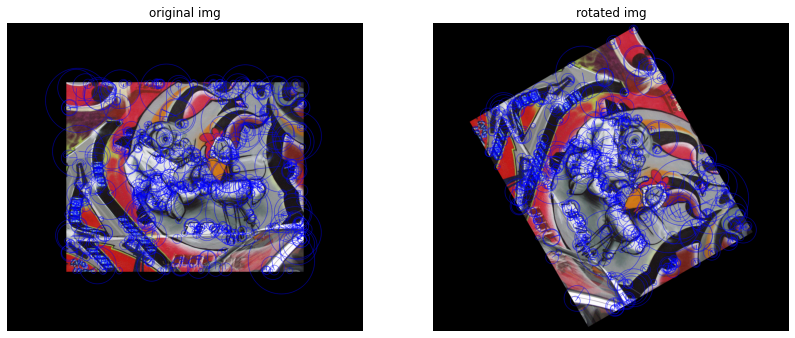

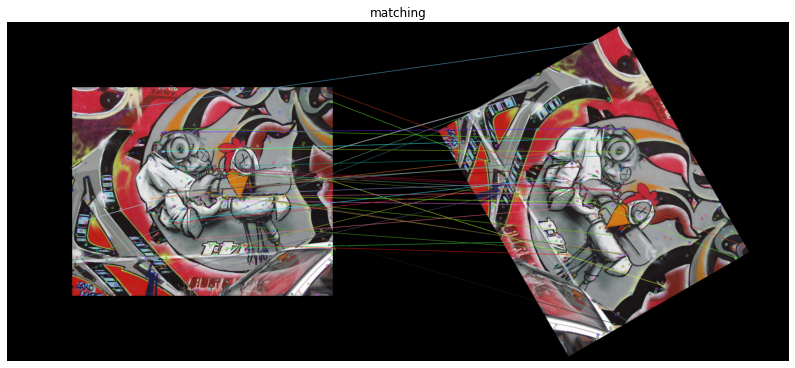

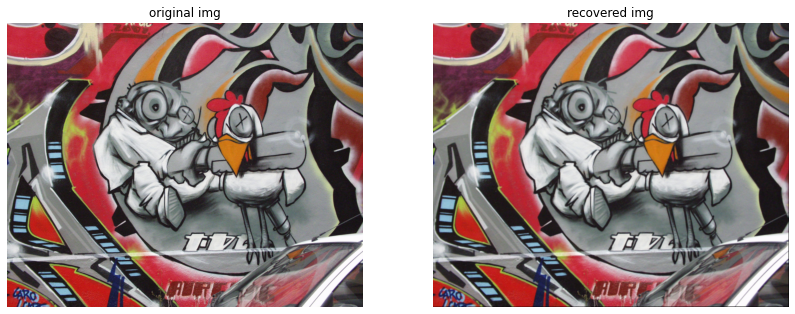

In [13]:
# Read image
# To prevent imaage from cropping, artificailly externd the image with black borders on all size 
img_input = cv2.imread('SourceImages/graf1.png')
img_input = cv2.copyMakeBorder(img_input,200,200,200,200,cv2.BORDER_CONSTANT)
#img_input = img_input.astype(np.float32)

##########--WRITE YOUR CODE HERE--##########
# create your surf detector here
surf = cv2.xfeatures2d.SURF_create(5000)

# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img_input,None)

# Draw keypoints on the image
# use cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS flag
res1 = cv2.drawKeypoints(img_input,kp,None,(255,0,0),4)

# rotate image
# use cv2.warpAffine to rotate image
# rotation
(h, w) = img_input.shape[:2]
(cX, cY) = (w // 2, h // 2)
rotation_deg = -60
affine_mat = cv2.getRotationMatrix2D((cX, cY), rotation_deg, 1.0)
img_input_rot = cv2.warpAffine(img_input,affine_mat,(w, h))

# find the keypoints and descriptors on the rotated image
kp_rot, des_rot = surf.detectAndCompute(img_input_rot,None)

# Draw keypoints on the rotated image
# use cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS flag
res2 = cv2.drawKeypoints(img_input_rot,kp_rot,None,(255,0,0),4)

##########-------END OF CODE-------##########

# Plot result images
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.imshow(res1[...,::-1]);
plt.title('original img')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(res2[...,::-1]);
plt.title('rotated img')
plt.axis('off')

##########--WRITE YOUR CODE HERE--##########
# compute feature matching
# use the knnMatch function in the cv2.BFMatcher class
bf = cv2.BFMatcher()
# Match descriptors.
raw_matches = bf.knnMatch(des,des_rot,k=2)

# Apply ratio test to keep good matches; ratio=0.3
good_matches = []
for m,n in raw_matches:
    if m.distance < 0.3*n.distance:
        good_matches.append([m])

# draw matching results with the given drawMatches function
res3 = cv2.drawMatchesKnn(img_input, kp, img_input_rot, kp_rot, good_matches, None)
##########-------END OF CODE-------##########

plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB));
plt.title('matching')
plt.axis('off')

##########--WRITE YOUR CODE HERE--##########
# find perspective transform matrix using RANSAC
# transform keypoints into numpy array
matched_pts =  np.array([kp[m[0].queryIdx].pt for m in good_matches], np.float32)
matched_pts_rot = np.array([kp_rot[m[0].trainIdx].pt for m in good_matches], np.float32)
M, mask = cv2.findHomography(matched_pts_rot, matched_pts, cv2.RANSAC,5.0)
# use cv2.findHomography
# mapping rotataed image back with the calculated rotation matrix
# use cv2.warpPerspective
# just read the instruction :)
row, cols = img_input.shape[0:2]
res4 = cv2.warpPerspective(img_input_rot,M,(cols,row))

# Recovering the original images by removing the border
img_input = img_input[200:-200,200:-200]
res4 = res4[200:-200,200:-200]
##########-------END OF CODE-------##########

# plot result images
plt.figure(figsize=(14,8));
plt.subplot(1, 2, 1);
plt.imshow(img_input[...,::-1]);
plt.title('original img');
plt.axis('off');

plt.subplot(1, 2, 2);
plt.imshow(res4[...,::-1]);
plt.title('recovered img');
plt.axis('off');


imgCenter = cv2.imread('SourceImages/img_c.jpg', cv2.IMREAD_COLOR)
imgRight = cv2.imread('SourceImages/img_r.jpg', cv2.IMREAD_COLOR)## Problem 2: Scene stitching with SURF features
{30 points + 15 bonus} You will match and align between different views of a
scene with SURF features.

Use `cv2.copyMakeBorder` function to pad the center image with zeros into a
larger size. Extract SURF features for all images and go through the same
procedures as you did in problem 1. Your goal is to find the affine
transformation between the two images and then align one of your images to the
other using `cv2.warpPerspective`. Use the `cv2.addWeighted` function (or your
own implementation) to blend the aligned images and show the stitched result.
Examples can be found at
https://docs.opencv.org/3.4.2/d0/d86/tutorial_py_image_arithmetics.html. Use
parameters `0.5` and `0.5` for alpha blending.

- **Step 1 (15pt)**. Compute the transformation from the right image to the
  center image. Warp the right image with the computed transformation. Stitch
  the center and right images with alpha blending. Display the SURF feature
  matching between the center and right images like you did in problem 1.
  Display the stitched result (center and right image).

- **Step 2 (15pt)** Compute the transformation from the left image to the
  stitched image from step 1. Warp the left image with the computed
  transformation. Stich the left and result images from step 1 with alpha
  blending. Display the SURF feature matching between the result image from
  step 1 and the left image like what you did in problem 1. Display the final
  stitched result (all three images).

- **Bonus (15pt)**. Instead of using `cv2.addWeighted` to do the blending,
  implement Laplacian Pyramids to blend the two aligned images. Tutorials can
  be found at http://6.869.csail.mit.edu/fa19/lectures/notes_lecture_7.pdf and
  http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html.
  Please be careful with the data type and the output image should be as sharp
  as the inputs. Display the stitched result (center and right image) and the
  final stitched result (all three images) with laplacian blending instead of
  alpha blending.

Note that for the resultant stitched image, the overlapping region might look
brighter or darker than the rest of the image. To get full credit, the final
image should have uniform illumination.

Hints: You need to find the warping matrix between images with the same
mechanism from problem 1. You will need as many reliable matches as possible to
find a good homography so set Hessian Threshold to `400` and the distance ratio
to `0.75` (instead of 0.3) in this case.

When you warp the image with `cv2.warpPerspective`, an important trick is to
pass in the correct parameters so that the warped image has the same size with
the padded_center image. Once you have two images with the same size, find the
overlapping part and do the blending. In addition, use `flag=cv2.INTER_NEAREST`
to avoid aliasing.

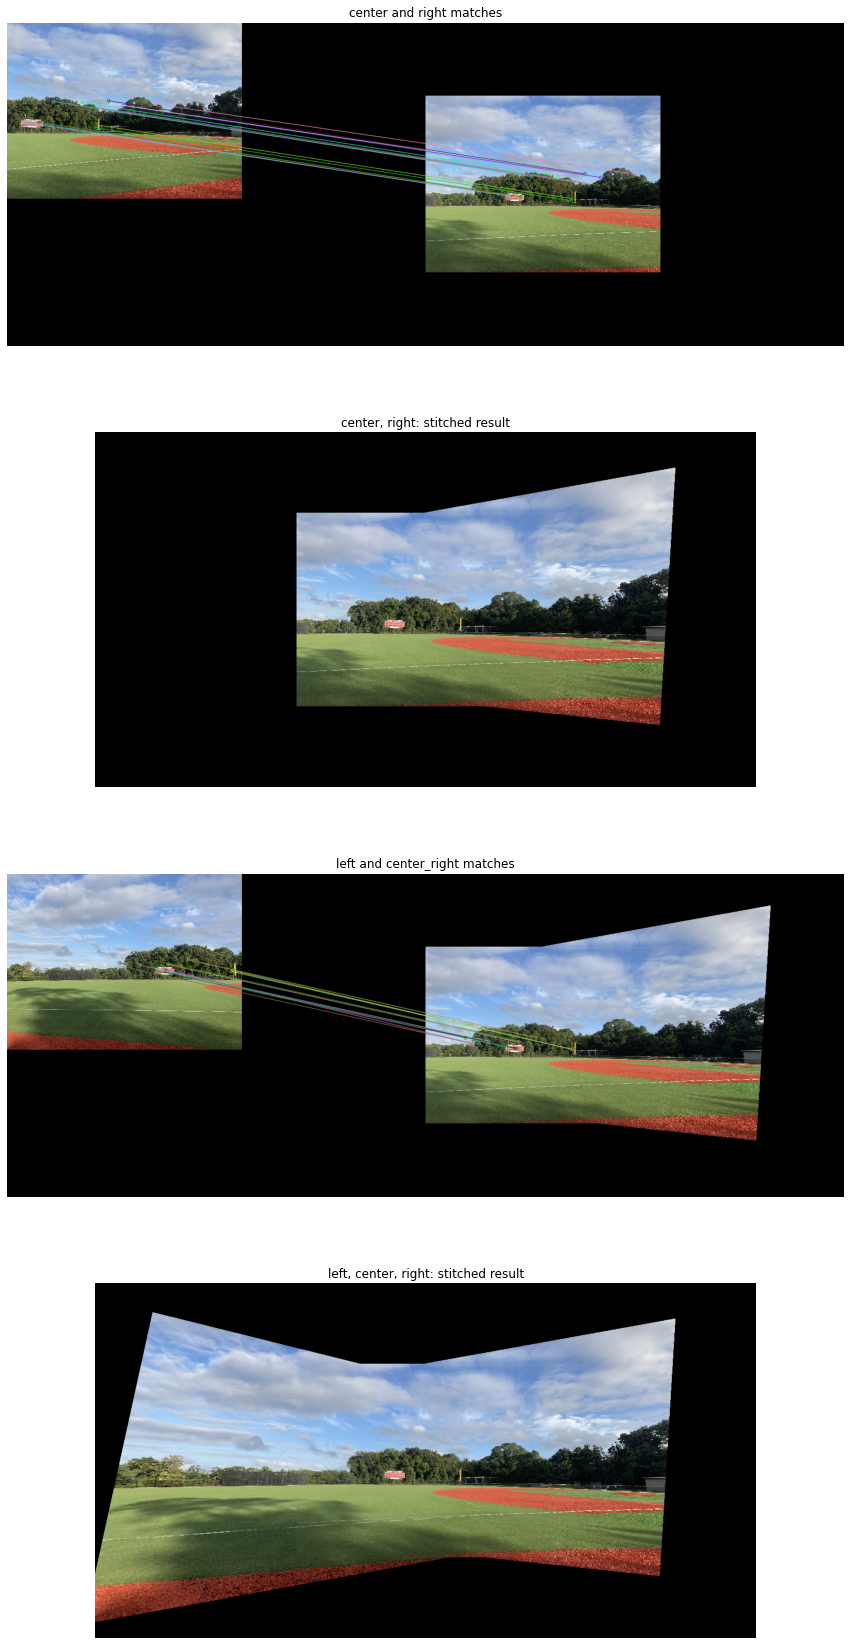

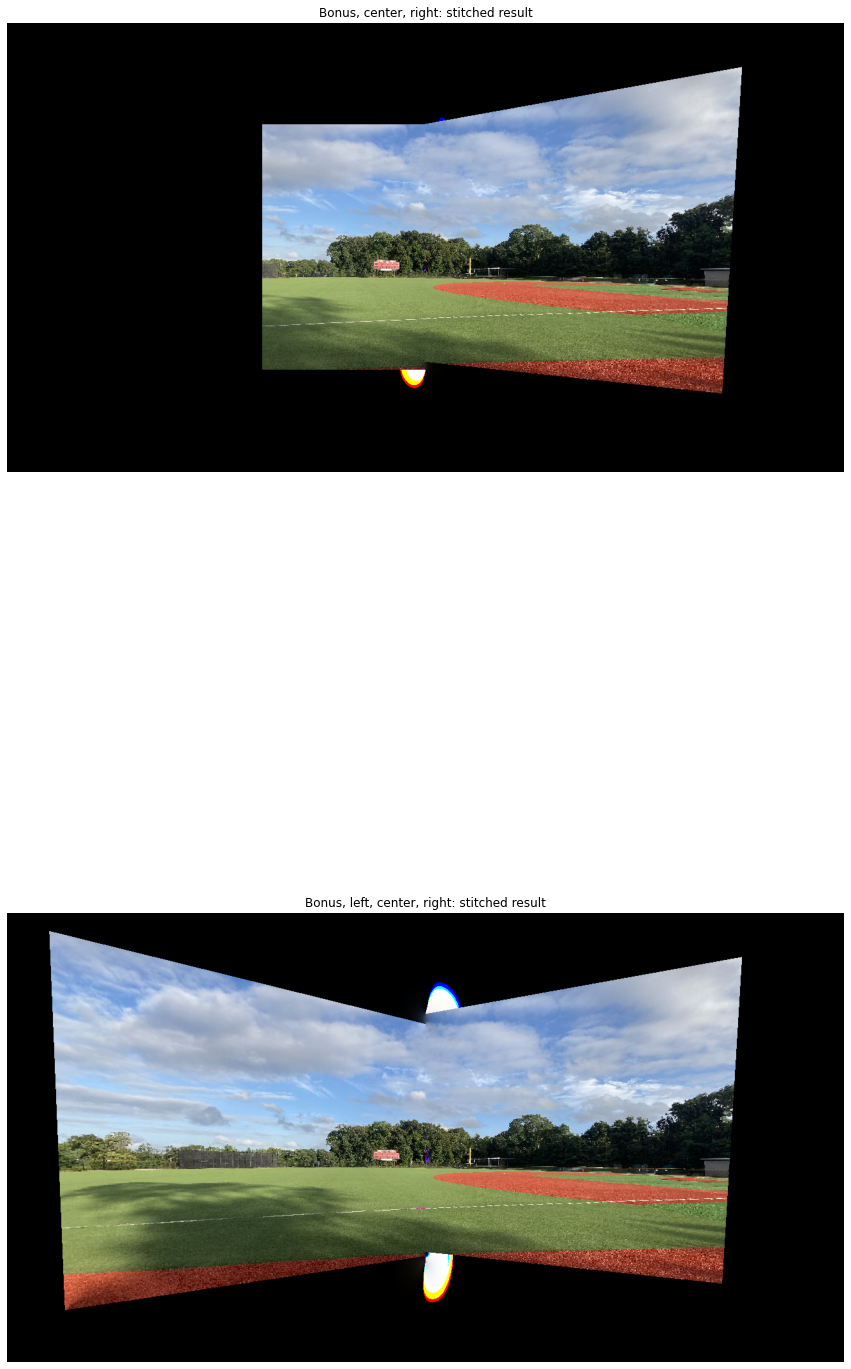

In [94]:
imgCenter = cv2.imread('SourceImages/img_c.jpg', cv2.IMREAD_COLOR)
imgRight = cv2.imread('SourceImages/img_r.jpg', cv2.IMREAD_COLOR)
imgLeft = cv2.imread('SourceImages/img_l.jpg', cv2.IMREAD_COLOR)

# initalize the stitched image as the center image
surf = cv2.xfeatures2d.SURF_create(5000)
# the following is recommended padding size, DO NOT change it
imgCenter = cv2.copyMakeBorder(imgCenter,160,160,400,400,cv2.BORDER_CONSTANT)

def alpha_blending(img_A, img_B):
    # Implement alpha_blending, using 0.5 and 0.5 for alphas
    ##########--WRITE YOUR CODE HERE--##########

    blended = np.zeros_like(img_A)

    # If pixel value zero for im1, apply weight 1 to the other image 
    # iF both are non zero, apply weight of 0.5 to both the images.  

    for i in range(img_A.shape[0]):
      for j in range(img_A.shape[1]):
        if (img_A[i,j].all() == 0):
          blended[i,j] = img_B[i,j]
        elif (img_B[i,j].all() == 0):
          blended[i,j] = img_A[i,j]
        else:
          blended[i,j] = 0.5 * img_A[i,j] + 0.5 * img_B[i,j]

    ##########-------END OF CODE-------##########
    return blended


def Laplacian_blending(img_A, img_B, num_levels=5, mask=None):
    # Implement Laplacian_blending
    # num_levels is the number of levels in the pyramids
    # assume mask is float32 [0,1], it has the same size as img_A and img_B
    # the mask indicates which parts of img_A or img_B are blended together
    # a simple example could be
    # mask = np.hstack([np.zeros([img_A.shape[0],img_A.shape[1]//2,img_A.shape[2]], np.float32),
    #  np.ones([img_B.shape[0],img_B.shape[1]//2,img_B.shape[2]], np.float32)])
    # but it depends on your choice
    # you may even skip this parameter if you always use one-half 0s and one-half 1s like the tutorial

    img_A = np.float32(img_A)
    img_B = np.float32(img_B)
    mask =  np.ones_like(img_A,dtype='float32')
    mask[:,img_A.shape[1]//2:,:] = 0

    assert img_A.shape == img_B.shape
    assert img_A.shape == mask.shape

    ##########--WRITE YOUR CODE HERE--##########

    # generate Gaussian pyramids for img_A, img_B and corresponding masks
    gp_A = [img_A.copy()]
    A = img_A.copy()

    gp_B = [img_B.copy()]
    B = img_B.copy()

    gp_M = [mask.copy()]
    M = mask.copy()

    #fig, axs = plt.subplots(3, 6,figsize=(18,10))

    for i in range(num_levels):
      
      A = cv2.pyrDown(A)
      gp_A.append(A)

      B = cv2.pyrDown(B)
      gp_B.append(B)

      M = cv2.pyrDown(M)
      gp_M.append(M)

      #axs[0,i].imshow(cv2.cvtColor(np.uint8(A), cv2.COLOR_BGR2RGB));
      #axs[1,i].imshow(cv2.cvtColor(np.uint8(A), cv2.COLOR_BGR2RGB));
      #axs[2,i].imshow(cv2.cvtColor(np.uint8(A), cv2.COLOR_BGR2RGB));

    # generate Laplacian pyramids for img_A, img_B and corresponding masks

    lp_A = [gp_A[num_levels]]
    for i in range(num_levels, 0, -1):
      img_proj = cv2.pyrUp(gp_A[i])
      diff = cv2.subtract(gp_A[i-1], img_proj)
      lp_A.append(diff)
      #axs[0,i].imshow(cv2.cvtColor(np.uint8(diff), cv2.COLOR_BGR2RGB));
 
    lp_B= [gp_B[num_levels]]
    for i in range(num_levels, 0, -1):
      img_proj = cv2.pyrUp(gp_B[i])
      diff = cv2.subtract(gp_B[i-1], img_proj)
      lp_B.append(diff)

    lp_M = gp_M[::-1]

    
    # now blend images with your mask in each level
    lbs = []
    for lp_1, lp_2, lpMask in zip(lp_A, lp_B, lp_M):
      lbs.append(lp_1 * lpMask + lp_2 * (1-lpMask))
      
    # now reconstruct the blended image
    blended = lbs[0]
    #plt.figure(figsize=(15,30));

    for i in range(1,num_levels+1):
      blended = cv2.pyrUp(blended)
      blended = cv2.add(blended, lbs[i])
      # Laplacian Blending images:
      #plt.subplot(1, num_levels, i);
      #plt.imshow(cv2.cvtColor(np.uint8(blended), cv2.COLOR_BGR2RGB));

    blended = np.uint8(blended);



    ##########-------END OF CODE-------##########
    return blended

def getTransform(img1, img2):
    ##########--WRITE YOUR CODE HERE--##########
    # compute sift descriptors
    kp_1, des_1 = surf.detectAndCompute(img1,None)
    kp_2, des_2 = surf.detectAndCompute(img2,None)

    # find all matches
    raw_matches = cv2.BFMatcher().knnMatch(des_1, des_2, k=2)

    # apply ratio test, use ratio = 0.75

    good_matches = []
    for m,n in raw_matches:
      if m.distance < 0.75 * n.distance:
        good_matches.append([m])

    # draw matches
    img_match = cv2.drawMatchesKnn(img1,kp_1,img2,kp_2,good_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


    # find perspective transform matrix using RANSAC
    matched_1 = np.array([kp_1[m[0].queryIdx].pt for m in good_matches], np.float32) # transform keypoints into numpy array
    matched_2 = np.array([kp_2[m[0].trainIdx].pt for m in good_matches], np.float32)
    H, mask = cv2.findHomography(matched_1, matched_2, cv2.RANSAC, 5.0)


    ##########-------END OF CODE-------##########
    # H is the perspective transform matrix
    # img_match is the image returned by drawMatches
    return H, img_match

def perspective_warping_alpha_blending(imgCenter, imgLeft, imgRight):
    ##########--WRITE YOUR CODE HERE--##########
    # Get homography from right to center
    # img_match_cr is your first output
    # call getTransform to get the transformation from the right to the center image
    M, img_match_cr = getTransform(imgRight, imgCenter)
    warp_rc = cv2.warpPerspective(imgRight, M, (imgCenter.shape[1], imgCenter.shape[0]),flags = cv2.INTER_NEAREST)


    # Blend center and right
    # stitched_cr is your second output, returned by alpha_blending
    # call alpha_blending
    stitched_cr = alpha_blending(imgCenter, warp_rc)


    # Get homography from left to stitched center_right
    # img_match_lcr is your third output
    # call getTransform to get the transformation from the left to stitched_cr
    M, img_match_lcr = getTransform(imgLeft, stitched_cr)
    warp_ls = cv2.warpPerspective(imgLeft, M, (stitched_cr.shape[1], stitched_cr.shape[0]),flags = cv2.INTER_NEAREST)


    # Blend left and center_right
    # stitched_lcr is your fourth output, returned by alpha_blending
    # call alpha_blending
    stitched_lcr = alpha_blending( warp_ls, stitched_cr)


    ##########-------END OF CODE-------##########
    return img_match_cr, stitched_cr, img_match_lcr, stitched_lcr

def perspective_warping_laplacian_blending(imgCenter, imgLeft, imgRight):
    ##########--WRITE YOUR CODE HERE--##########
    # Get homography from right to center
    # call getTransform to get the transformation from the right to the center image

    M, img_match_cr = getTransform(imgRight, imgCenter)
    img_warp_rc = cv2.warpPerspective(imgRight, M, (imgCenter.shape[1], imgCenter.shape[0]), flags = cv2.INTER_NEAREST)


    # Blend center and right
    # stitched_cr is your first bonus output, returned by Laplacian_blending
    # call Laplacian_blending
    stitched_cr = Laplacian_blending(imgCenter, img_warp_rc)



    # Get homography from left to stitched center_right
    # call getTransform to get the transformation from the left to stitched_cr
    M, img_match_lcr = getTransform(imgLeft, stitched_cr)
    img_warp_ls = cv2.warpPerspective(imgLeft, M, (stitched_cr.shape[1], stitched_cr.shape[0]), flags = cv2.INTER_NEAREST)


    # Blend left and center_right
    # stitched_lcr is your second bonus output, returned by Laplacian_blending
    # call Laplacian_blending

    stitched_lcr = Laplacian_blending(img_warp_ls, stitched_cr)


    ##########-------END OF CODE-------##########
    return img_match_cr, stitched_cr, img_match_lcr, stitched_lcr


img_match_cr, stitched_cr, img_match_lcr, stitched_lcr = perspective_warping_alpha_blending(imgCenter, imgLeft, imgRight)
img_match_cr_lap, stitched_cr_lap, img_match_lcr_lap, stitched_lcr_lap = perspective_warping_laplacian_blending(imgCenter, imgLeft, imgRight)

plt.figure(figsize=(15,30));
plt.subplot(4, 1, 1);
plt.imshow(cv2.cvtColor(img_match_cr, cv2.COLOR_BGR2RGB));
plt.title("center and right matches");
plt.axis('off');
plt.subplot(4, 1, 2);
plt.imshow(cv2.cvtColor(stitched_cr, cv2.COLOR_BGR2RGB));
plt.title("center, right: stitched result");
plt.axis('off');
plt.subplot(4, 1, 3);
plt.imshow(cv2.cvtColor(img_match_lcr, cv2.COLOR_BGR2RGB));
plt.title("left and center_right matches");
plt.axis('off');
plt.subplot(4, 1, 4);
plt.imshow(cv2.cvtColor(stitched_lcr, cv2.COLOR_BGR2RGB));
plt.title("left, center, right: stitched result");
plt.axis('off');
plt.show();

plt.figure(figsize=(15,30));
plt.subplot(2, 1, 1);
plt.imshow(cv2.cvtColor(stitched_cr_lap, cv2.COLOR_BGR2RGB));
plt.title("Bonus, center, right: stitched result");
plt.axis('off');
plt.subplot(2, 1, 2);
plt.imshow(cv2.cvtColor(stitched_lcr_lap, cv2.COLOR_BGR2RGB));
plt.title("Bonus, left, center, right: stitched result");
plt.axis('off');


## Problem 3: Object Recognition with HOG features
{30 points} You will use the histogram of oriented gradients (HOG) to extract
features from objects and recognize them.

HOG decomposes an image into multiple cells, computes the direction of the
gradients for all pixels in each cell, and creates a histogram of gradient
orientation for that cell. Object recognition with HOG is usually done by
extracting HOG features from a training set of images, learning a support
vector machine (SVM) from those features, and then testing a new image with the
SVM to determine the existence of an object.

You can use `cv2.ml.SVM_create` for SVMs. You can also use Python machine
learning packages for SVM, e.g.`scikit-learn` and for HOG computation, e.g.
`scikit-image`. Please find the OpenCV SVM tutorial at
https://www.learnopencv.com/handwritten-digits-classification-an-opencv-c-python-tutorial/.

An image set located under SourceImages/human_vs_birds is provided containing
20 images. You will first train an SVM with the HOG features and then predict
the class of an image with the trained SVM. For simplicity, we will be dealing
with a binary classification problem with two classes, namely, birds and
humans. There are 10 images for each class.

Some of the function names and arguments are provided, you may change them as
you see fit.

- **Step 1 (5pts)**. Load in the images and create a vector of corresponding
  labels (0 for bird and 1 for human). An example label vector should be
  something like [1,1,1,1,1,0,0,0,0,0]. Pick first `8` samples from each class
  as your training set. Display them in a 2 x 8 grid with figsize = (18, 15).
  The rest `4` images are used as test data.

- **Step 2 (10pts)**. Extract HOG features from all images. You can use the
  OpenCV function `cv2.HOGDescriptor` or HOG routine from `scikit-image`.
  Display the HOG features for training images in a 2 x 8 grid with figsize =
  (18, 15).

- **Step 3**. Shuffle the training data and reshape the HOG feature matrix as
  necessary to feed into the SVM. Train the classifier. **DO NOT train with
  test data.** No output is expected from this part.

- **Step 4 (15pts)**. Perform predictions with your trained SVM on the test
  data. Output a vector of predictions, a vector of ground truth labels, and
  prediction accuracy. Tune the parameters of HOG features and SVM to achieve
  an accuracy as high as possible.

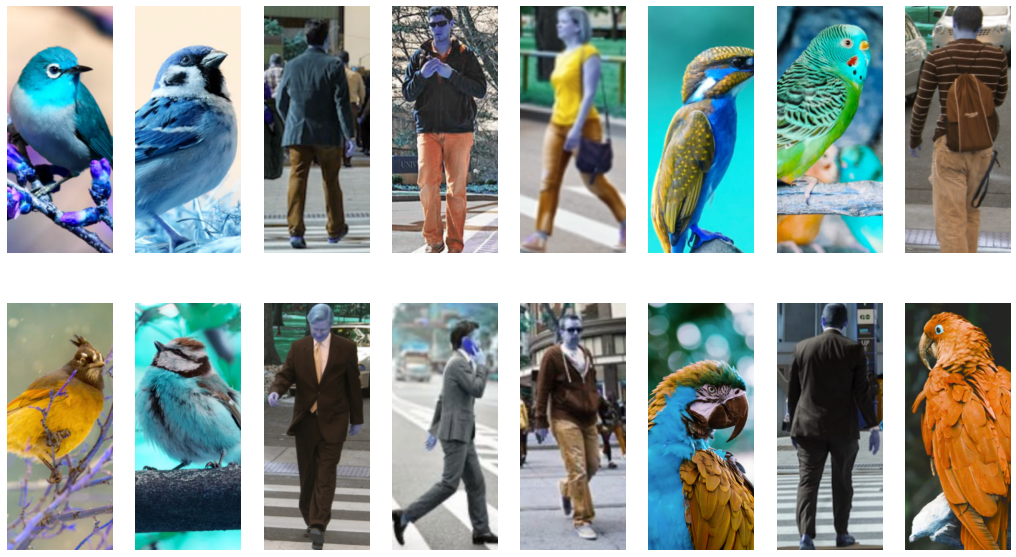

In [95]:
import skimage.exposure
import random
from sklearn.utils import shuffle
from skimage.feature import hog
from sklearn.svm import LinearSVC

def loadData(path):
    img = [cv2.imread(f'{path}{i+1}.png') for i in range(10)]
    return img

imgs_train_1 = loadData('SourceImages/human_vs_birds/human_')
imgs_train_0 = loadData('SourceImages/human_vs_birds/bird_')

##########--WRITE YOUR CODE HERE--##########
# combine class 0 with class 1
imgs_train = imgs_train_0[:8] + imgs_train_1[:8]
imgs_test =imgs_train_0[8:] + imgs_train_1[8:]

# create class labels, assume bird = 0, human = 1
labels_train =[0] * 8 + [1] * 8
labels_test = [0] * 2 + [1] * 2

imgs_train, labels_train = shuffle(imgs_train, labels_train)

##########-------END OF CODE-------##########

# display the TRAINING set in a 2 x 8 grid with figsize = (18, 10)
##########--WRITE YOUR CODE HERE--##########
fig, axs = plt.subplots(2, 8, figsize=(18,10))

for i, img in enumerate(imgs_train[:8]):
  axs[0, i].imshow(img)
  axs[0, i].axis('off')
for i, img in enumerate(imgs_train[8:]):
  axs[1, i].imshow(img)
  axs[1, i].axis('off')

plt.show()
##########-------END OF CODE-------##########



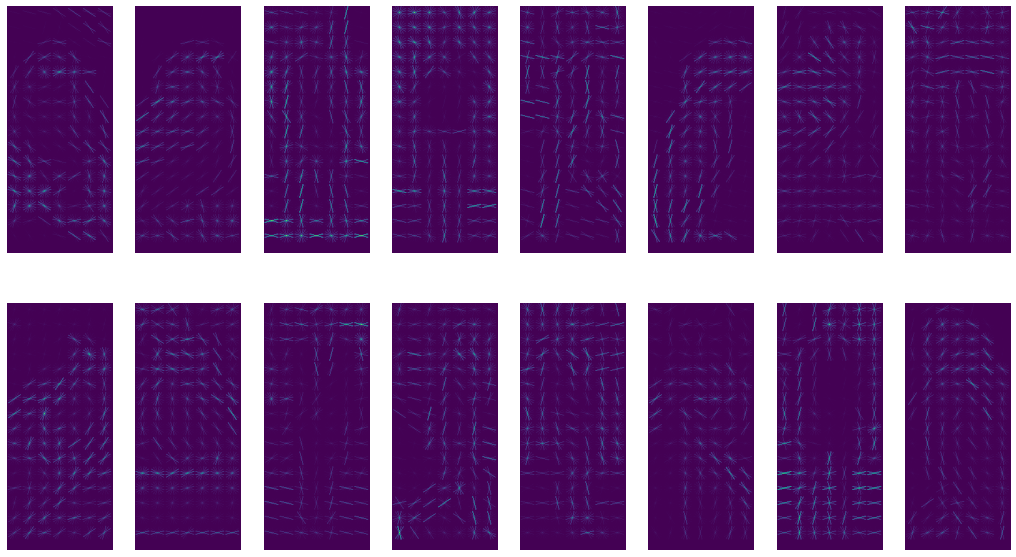

In [97]:

# Compute HOG features for the images
def computeHOGfeatures(image):
    # Compute HOG descriptors of a single image
    # you can use skimage.feature.hog and try your own parameters
    ##########--WRITE YOUR CODE HERE--##########
    hog_descriptor, hog_image = hog(image, orientations=8, pixels_per_cell=(24, 24), cells_per_block=(1, 1), visualize=True, multichannel=True)

    ##########-------END OF CODE-------##########
    return hog_descriptor, hog_image

def computeHOGfeaturesBatch(imgs):
    # Compute HOG descriptors of a batch of images
    ##########--WRITE YOUR CODE HERE--##########
    hog_descriptors = []
    hog_images = []
    for img in imgs:
      hog_descriptor, hog_image = computeHOGfeatures(img)
      hog_descriptors.append(hog_descriptor)
      hog_images.append(hog_image)
    ##########-------END OF CODE-------##########
    return hog_descriptors, hog_images


Hogs_train, Hog_imgs_train = computeHOGfeaturesBatch(imgs_train)
Hogs_test, Hog_imgs_test = computeHOGfeaturesBatch(imgs_test)


# display hog images CORRESPONDING to the images you chosed in previous step
# in a 2 x 8 grid with figsize = (18, 10)
##########--WRITE YOUR CODE HERE--##########
fig, axs = plt.subplots(2, 8, figsize=(18, 10))

for i, img in enumerate(Hog_imgs_train[:8]):
  # axs[0, i].set_title("Bird: "+ str(i+1))
  axs[0, i].imshow(img)
  axs[0, i].axis('off')

for i, img in enumerate(Hog_imgs_train[8:]):
  # axs[1, i].set_title("Human")
  axs[1, i].imshow(img)
  axs[1, i].axis('off')
plt.show()
##########-------END OF CODE-------##########



In [98]:
###########--WRITE YOUR CODE HERE--##########
# create a svm model and set your own hyper-parameters
svm = LinearSVC()

# train svm with training data
svm.fit(Hogs_train, labels_train)


# make predictions on test data
labels_test_pred = svm.predict(Hogs_test)
##########-------END OF CODE-------##########

# print predictions and accuracy
print('Predicted labels: ', labels_test_pred.astype(np.int32).reshape([-1]))
print('Ground truth labels: ', np.array(labels_test).astype(np.int32).reshape([-1]))
print('Accuracy: ', np.mean(labels_test_pred.astype(np.int32)==np.array(labels_test).astype(np.int32))*100, '%')

Predicted labels:  [0 0 1 1]
Ground truth labels:  [0 0 1 1]
Accuracy:  100.0 %


## Submission guidelines
---
Your need to submit a single zip file to Blackboard described as follow.

Please generate a pdf file that includes a ***google shared link*** (explained
in the next paragraph). This pdf file should be named as
***Surname_Givenname_SBUID_hw*\*.pdf** (example:
Jordan_Michael_111234567_hw2.pdf for this assignment).

To generate the ***google shared link***, first create a folder named
***Surname_Givenname_SBUID_hw**** in your Google Drive with your Stony Brook
account. The structure of the files in the folder should be exactly the same as
the one you downloaded. For instance in this homework:

```
Surname_Givenname_SBUID_hw2
        |---Results
        |---SourceImages
        |---CSE527-HW2-fall20.ipynb
```
Note that this folder should be in your Google Drive with your Stony Brook account.

Then right click this folder, click ***Get shareable link***, in the People
textfield, enter the TA's email: ***bjha@cs.stonybrook.edu***,
***li.wenchen@stonybrook.edu***, ***yifeng.huang@stonybrook.edu***. Make sure
that TAs who have the link **can edit**, ***not just*** **can view**, and also
**uncheck** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right
before the timestamp of the submission made in blackboard.

To submit to Blackboard, zip ***Surname_Givenname_SBUID_hw*\*.pdf** and
***Surname_Givenname_SBUID_hw**** folder together and name your zip file as
***Surname_Givenname_SBUID_hw*\*.zip**.

The input and output paths are predefined and **DO NOT** change them, (we
assume that 'Surname_Givenname_SBUID_hw2' is your working directory, and all
the paths are relative to this directory).  The image read and write functions
are already written for you. All you need to do is to fill in the blanks as
indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on EdStem. Based on the amount
of email that we have received in past years, there might be dealys in replying
to personal emails. Please ask questions on EdStem and send emails only for
personal issues.

If you alter the folder structures, the grading of your homework will be
significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and
horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have
4 days throughout the whole semester to submit late without penalty. Note that
the grace period is calculated by days instead of hours. If you submit the
homework one minute after the deadline, one late day will be counted. Likewise,
if you submit one minute after the deadline, the 10% penaly will be imposed if
not using the grace period.